
# Q6: Can we predict lithology without labeled data?
    a. Use clustering algorithms to identify clusters of similar lithology based on wireline well logs data.
    b. Compare the clusters to the labeled data to determine if the clusters correspond to different lithology.

**Purpose of the question**: if the data labels not accurate, can we have a better classification method

In [1]:
import lasio
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from utils import *
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("./Data/labeled_logs.csv")
rename_columns(df)

In [3]:
df = df.drop(
    [
        My_Columns.FORMATION,
        My_Columns.GROUP,
        My_Columns.WELL,
        My_Columns.X_LOC,
        My_Columns.Y_LOC,
        My_Columns.Z_LOC,
        My_Columns.WELL,
        My_Columns.CONFIDENCE,
        My_Columns.AVERAGE_RATE_OF_PENETRATION,
        My_Columns.WEIGHT_OF_DRILLING_MUD,
        My_Columns.FLUSHED_ZONE_RESISTIVITY,
        My_Columns.DIFFERENTIAL_CALIPER,
        My_Columns.SPECTRA_GAMMA_RAY,
        My_Columns.SHEAR_WAVE_SONIC,
        My_Columns.MICRO_RESISTIVITY,
    ],
    axis=1,
)
df.isnull().sum()
df = df.dropna()


In [4]:
df.columns, len(df.columns)

(Index(['Measured Depth', 'Caliper', 'Shallow Resistivity',
        'Medium Deep Resistivity', 'Deep Resistivity', 'Bulk Density',
        'Gamma Ray', 'Neutron Porosity', 'Photo Electric Factor',
        'Compressional waves sonic', 'Self Potential', 'Borehole Size',
        'Rate of Penetration', 'Density Correction', 'LITHOLOGY'],
       dtype='object'),
 15)

In [5]:
rename_lithology(df)
lithology_to_class(df)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

scaler = StandardScaler()
scaler.fit(df.drop("LITHOLOGY", axis=1))
scaled_features = scaler.transform(df.drop("LITHOLOGY", axis=1))

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg_list = []
wcss = []

for n_clusters in range(2, 20):
    clusterer = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_features)
    wcss.append(clusterer.inertia_)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


For n_clusters = 2 The average silhouette_score is : 0.35583454607670223
For n_clusters = 3 The average silhouette_score is : 0.25865931693534255
For n_clusters = 4 The average silhouette_score is : 0.270600287991492
For n_clusters = 5 The average silhouette_score is : 0.2800141225634406
For n_clusters = 6 The average silhouette_score is : 0.284398679264704
For n_clusters = 7 The average silhouette_score is : 0.2899213639726268
For n_clusters = 8 The average silhouette_score is : 0.284402250382255
For n_clusters = 9 The average silhouette_score is : 0.2950841902230729
For n_clusters = 10 The average silhouette_score is : 0.2542013406663227
For n_clusters = 11 The average silhouette_score is : 0.2554848222223228
For n_clusters = 12 The average silhouette_score is : 0.27829983243384804
For n_clusters = 13 The average silhouette_score is : 0.29069431540647295
For n_clusters = 14 The average silhouette_score is : 0.27621941918095605
For n_clusters = 15 The average silhouette_score is : 0.2

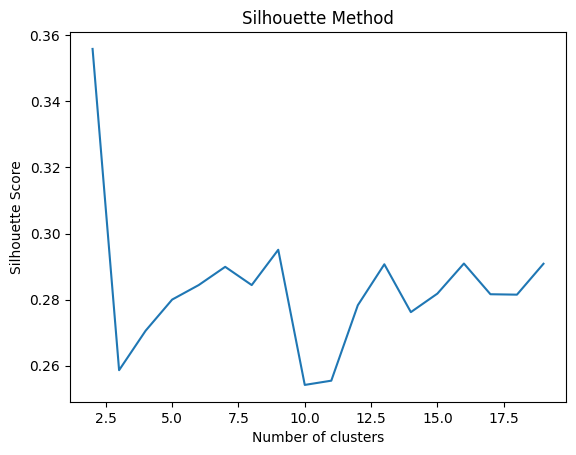

In [22]:
plt.plot(range(2, 20), silhouette_avg_list)
plt.title("Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()


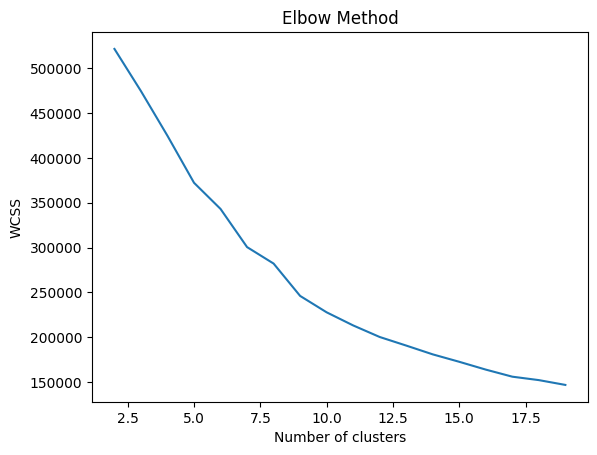

In [23]:
plt.plot(range(2, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [7]:
final_n_clusters = 9

kmeans = KMeans(n_clusters=final_n_clusters, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(scaled_features)

df["cluster"] = y_kmeans


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 52368 samples in 0.082s...
[t-SNE] Computed neighbors for 52368 samples in 8.647s...
[t-SNE] Computed conditional probabilities for sample 1000 / 52368
[t-SNE] Computed conditional probabilities for sample 2000 / 52368
[t-SNE] Computed conditional probabilities for sample 3000 / 52368
[t-SNE] Computed conditional probabilities for sample 4000 / 52368
[t-SNE] Computed conditional probabilities for sample 5000 / 52368
[t-SNE] Computed conditional probabilities for sample 6000 / 52368
[t-SNE] Computed conditional probabilities for sample 7000 / 52368
[t-SNE] Computed conditional probabilities for sample 8000 / 52368
[t-SNE] Computed conditional probabilities for sample 9000 / 52368
[t-SNE] Computed conditional probabilities for sample 10000 / 52368
[t-SNE] Computed conditional probabilities for sample 11000 / 52368
[t-SNE] Computed conditional probabilities for sample 12000 / 52368
[t-SNE] Computed conditional probabilities for sa

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

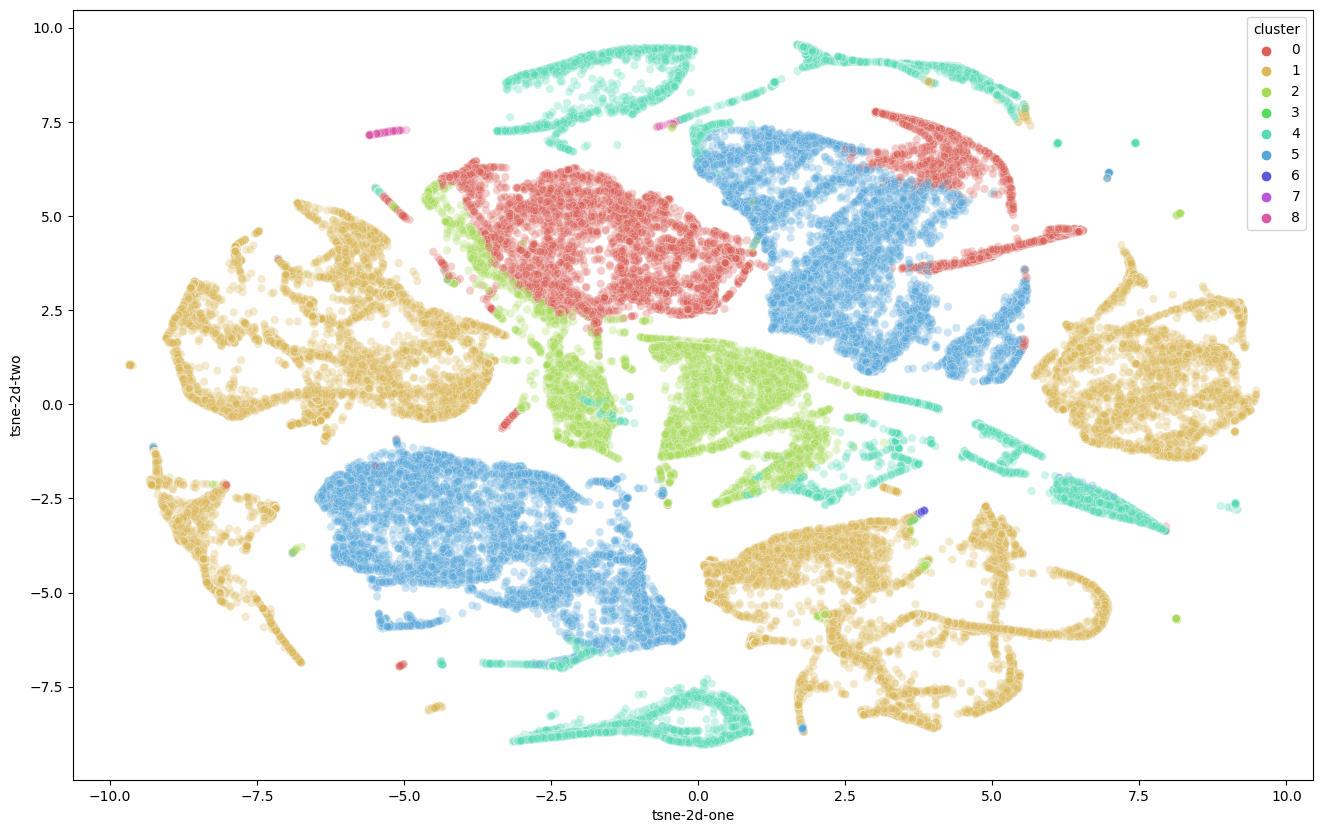

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaled_features)

df["tsne-2d-one"] = tsne_results[:, 0]
df["tsne-2d-two"] = tsne_results[:, 1]

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", final_n_clusters),
    data=df,
    legend="full",
    alpha=0.3,
)

In [9]:
# find the class number of sandstone
for i in range(0, len(class_number_to_lithology)):
    if class_number_to_lithology[i] == "Sandstone":
        print(i)


0


In [10]:
# find the cluster with the most sandstone
df[df["LITHOLOGY"] == 0]["cluster"].value_counts()

1    4065
4    1440
2     512
5     345
0     228
7      12
3       9
6       5
8       4
Name: cluster, dtype: int64